In [1]:
import pynapple as nap
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from scipy import stats

from neuralensemble import assemblyPCA

In [3]:

recDuration = 2000.; #recording duration in secs
sessionEpoch = nap.IntervalSet(start = 0, end = recDuration, time_units = 's')
wakeEpoch = nap.IntervalSet(start = 0, end = 999, time_units = 's')
sleepEp = nap.IntervalSet(start = 1000, end = recDuration, time_units = 's')

# Let's imagine we have done some sleep scoring identifying NREM sleep episodes
nremEp = nap.IntervalSet(start = [1100, 1500], end = [1200, 1700], time_units = 's')

# We just create fake spike trains
spikes =  {}

for s in range(50):
    random_rate = 10 * np.random.rand(1)
    random_times = np.random.uniform(0, recDuration, int(np.rint(recDuration * random_rate)))
    random_times = np.sort(random_times)
    my_spike = nap.Ts(random_times, time_units = 's')
    spikes[s] = my_spike
    
# Define pynapple's TsGroup (perfectly suited for spike trains)    
spikeGrp = nap.TsGroup(data = spikes, time_support = sessionEpoch)

# Bin the spike trains (in 100ms bins)
binnedSpk = spikeGrp.count(0.1)

# Define two intervalsets and append them in a list
epochTest = [];
epochTest.append(nap.IntervalSet(start = [1100,1300], end = [1200,1350], time_units = 's'))
epochTest.append(sleepEp.intersect(nremEp))

PCA based assembly activation, with 3 PCs



<AxesSubplot:xlabel='Time (s)'>

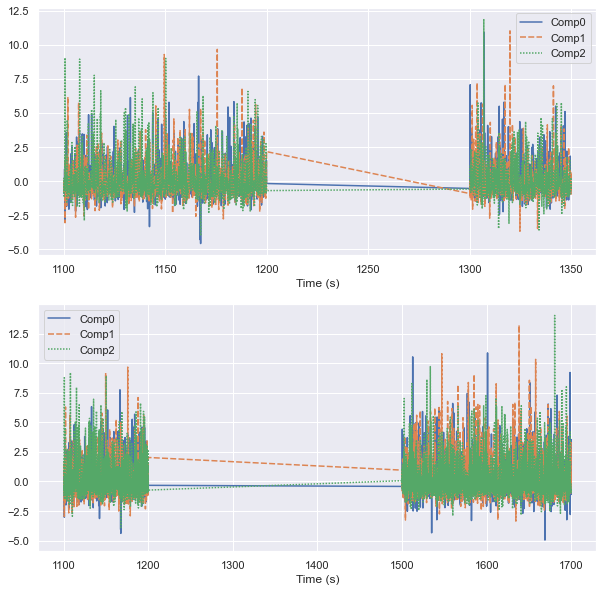

In [4]:
# Call the neuralensemble module to compute PCA-based assembly activation
reactPCA, comp = assemblyPCA(binnedSpk, wakeEpoch, epochTest = epochTest, method = None, numComp = 3)

# and plot the result
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(ax = axes[0], data=reactPCA[0].as_units('s'))
sns.lineplot(ax = axes[1], data=reactPCA[1].as_units('s'))